In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import os, re
from tensorflow import keras
import keras
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics, preprocessing
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.layers import BatchNormalization

In [2]:
train_df = pd.read_csv('mixed.csv', sep='\t')
test_df = pd.read_csv('mixed_test.csv', sep='\t')

In [3]:
train_df = shuffle(train_df)

In [4]:
X = train_df[['peak_1', 'h_1', 'k_1', 'l_1', 'peak_2', 'h_2', 'k_2', 'l_2', 'peak_3', 'h_3', 'k_3', 'l_3', 'peak_4', 'h_4', 'k_4', 'l_4', 'peak_5', 'h_5', 'k_5', 'l_5', 'peak_6', 'h_6', 'k_6', 'l_6']]
y = train_df['Space_code']

In [7]:
model = models.Sequential()
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=24))
BatchNormalization()
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(9, activation='softmax'))
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
N_iterations = 10
N_folds = 5

# Initialize array to store the scores of each K-fold cross-validation
scores = []

# This loop is what makes it iterated K-fold validation
for i in range(N_iterations):

    skf = StratifiedKFold(n_splits=N_folds, shuffle=True)

    # This loops is traditional K-fold cross validation
    for j, (train_index, test_index) in enumerate(skf.split(X, y), 0):

        train_features = X.iloc[train_index]
        test_features = X.iloc[test_index]

        train_labels = y.iloc[train_index]
        test_labels = y.iloc[test_index]
        
        one_hot_train_labels = to_categorical(train_labels)
        one_hot_test_labels = to_categorical(test_labels)
        
        X_val = train_features[:200]
        partial_X_train = train_features[200:]
        y_val = one_hot_train_labels[:200]
        partial_y_train = one_hot_train_labels[200:]

        model.fit(partial_X_train, partial_y_train, epochs=200, batch_size=50, validation_data=(X_val, y_val))

        scores.append(model.evaluate(test_features, one_hot_test_labels))


Epoch 1/200
12/12 [==============================] - 1s 38ms/step - loss: 2.5018 - accuracy: 0.4092 - val_loss: 1.3986 - val_accuracy: 0.7900
Epoch 2/200
12/12 [==============================] - 0s 16ms/step - loss: 1.6330 - accuracy: 0.6573 - val_loss: 1.2691 - val_accuracy: 0.7900
Epoch 3/200
12/12 [==============================] - 0s 15ms/step - loss: 1.2778 - accuracy: 0.7500 - val_loss: 1.0753 - val_accuracy: 0.8150
Epoch 4/200
12/12 [==============================] - 0s 17ms/step - loss: 1.1282 - accuracy: 0.7990 - val_loss: 0.9907 - val_accuracy: 0.8350
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 1.0684 - accuracy: 0.8209 - val_loss: 0.9801 - val_accuracy: 0.8500
Epoch 6/200
12/12 [==============================] - 0s 15ms/step - loss: 0.9143 - accuracy: 0.8444 - val_loss: 0.9323 - val_accuracy: 0.8850
Epoch 7/200
12/12 [==============================] - 0s 22ms/step - loss: 0.8897 - accuracy: 0.8661 - val_loss: 0.8699 - val_accuracy: 0.8850
Epoch 

12/12 [==============================] - 0s 15ms/step - loss: 0.1422 - accuracy: 0.9865 - val_loss: 0.3899 - val_accuracy: 0.9500
Epoch 116/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0953 - accuracy: 0.9967 - val_loss: 0.3967 - val_accuracy: 0.9400
Epoch 117/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0961 - accuracy: 0.9958 - val_loss: 0.3272 - val_accuracy: 0.9600
Epoch 118/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0996 - accuracy: 0.9931 - val_loss: 0.3751 - val_accuracy: 0.9550
Epoch 119/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1219 - accuracy: 0.9873 - val_loss: 0.4190 - val_accuracy: 0.9450
Epoch 120/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0985 - accuracy: 0.9923 - val_loss: 0.4197 - val_accuracy: 0.9450
Epoch 121/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0983 - accuracy: 0.9926 - val_loss: 0.3000 - val_accuracy: 0.9600
Epoch 

Epoch 172/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0720 - accuracy: 0.9960 - val_loss: 0.4175 - val_accuracy: 0.9500
Epoch 173/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0720 - accuracy: 0.9968 - val_loss: 0.3847 - val_accuracy: 0.9600
Epoch 174/200
12/12 [==============================] - 0s 16ms/step - loss: 0.1092 - accuracy: 0.9936 - val_loss: 0.3645 - val_accuracy: 0.9500
Epoch 175/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0781 - accuracy: 0.9979 - val_loss: 0.3340 - val_accuracy: 0.9600
Epoch 176/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0787 - accuracy: 0.9933 - val_loss: 0.3590 - val_accuracy: 0.9550
Epoch 177/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0736 - accuracy: 0.9923 - val_loss: 0.5441 - val_accuracy: 0.9350
Epoch 178/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0807 - accuracy: 0.9967 - val_loss: 0.3972 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.0873 - accuracy: 0.9845 - val_loss: 0.3320 - val_accuracy: 0.9500
Epoch 86/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0737 - accuracy: 0.9948 - val_loss: 0.2586 - val_accuracy: 0.9600
Epoch 87/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0574 - accuracy: 0.9983 - val_loss: 0.2284 - val_accuracy: 0.9750
Epoch 88/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0753 - accuracy: 0.9948 - val_loss: 0.5221 - val_accuracy: 0.9200
Epoch 89/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0813 - accuracy: 0.9879 - val_loss: 0.2538 - val_accuracy: 0.9600
Epoch 90/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0534 - accuracy: 0.9983 - val_loss: 0.3259 - val_accuracy: 0.9550
Epoch 91/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0635 - accuracy: 0.9966 - val_loss: 0.3357 - val_accuracy: 0.9500
Epoch 92/200

12/12 [==============================] - 0s 15ms/step - loss: 0.0472 - accuracy: 1.0000 - val_loss: 0.2920 - val_accuracy: 0.9650
Epoch 143/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0568 - accuracy: 0.9931 - val_loss: 0.2691 - val_accuracy: 0.9550
Epoch 144/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0622 - accuracy: 0.9948 - val_loss: 0.2223 - val_accuracy: 0.9700
Epoch 145/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0544 - accuracy: 0.9948 - val_loss: 0.3956 - val_accuracy: 0.9450
Epoch 146/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0529 - accuracy: 1.0000 - val_loss: 0.2110 - val_accuracy: 0.9600
Epoch 147/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0944 - accuracy: 0.9931 - val_loss: 0.3544 - val_accuracy: 0.9600
Epoch 148/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0514 - accuracy: 0.9983 - val_loss: 0.2126 - val_accuracy: 0.9550
Epoch 

Epoch 199/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0565 - accuracy: 0.9948 - val_loss: 0.2863 - val_accuracy: 0.9600
Epoch 200/200
7/7 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.9692
Epoch 1/200
12/12 [==============================] - 0s 22ms/step - loss: 0.1525 - accuracy: 0.9862 - val_loss: 0.3360 - val_accuracy: 0.9550
Epoch 2/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1349 - accuracy: 0.9862 - val_loss: 0.3043 - val_accuracy: 0.9550
Epoch 3/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0859 - accuracy: 0.9914 - val_loss: 0.2731 - val_accuracy: 0.9500
Epoch 4/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0635 - accuracy: 0.9931 - val_loss: 0.3266 - val_accuracy: 0.9450
Epoch 5/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0563 - accuracy: 0.9966 - val_loss: 0.3810 - val_accuracy: 0.9550
Epoch 6/200
12/12 [============================

12/12 [==============================] - 0s 15ms/step - loss: 0.0445 - accuracy: 0.9966 - val_loss: 0.4591 - val_accuracy: 0.9450
Epoch 113/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0577 - accuracy: 0.9914 - val_loss: 0.4272 - val_accuracy: 0.9450
Epoch 114/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0402 - accuracy: 0.9983 - val_loss: 0.4609 - val_accuracy: 0.9450
Epoch 115/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.9983 - val_loss: 0.4569 - val_accuracy: 0.9450
Epoch 116/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.5042 - val_accuracy: 0.9400
Epoch 117/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0723 - accuracy: 0.9914 - val_loss: 0.4080 - val_accuracy: 0.9400
Epoch 118/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0468 - accuracy: 0.9983 - val_loss: 0.4647 - val_accuracy: 0.9400
Epoch 

Epoch 169/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0476 - accuracy: 0.9948 - val_loss: 0.5058 - val_accuracy: 0.9400
Epoch 170/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0482 - accuracy: 0.9948 - val_loss: 0.4590 - val_accuracy: 0.9350
Epoch 171/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0417 - accuracy: 0.9948 - val_loss: 0.4050 - val_accuracy: 0.9400
Epoch 172/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0655 - accuracy: 0.9845 - val_loss: 0.4933 - val_accuracy: 0.9450
Epoch 173/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0467 - accuracy: 0.9966 - val_loss: 0.5346 - val_accuracy: 0.9400
Epoch 174/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0420 - accuracy: 0.9966 - val_loss: 0.5731 - val_accuracy: 0.9450
Epoch 175/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0422 - accuracy: 0.9983 - val_loss: 0.5193 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 1.0000 - val_loss: 0.3376 - val_accuracy: 0.9650
Epoch 83/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0467 - accuracy: 0.9914 - val_loss: 0.4387 - val_accuracy: 0.9350
Epoch 84/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0514 - accuracy: 0.9948 - val_loss: 0.2893 - val_accuracy: 0.9550
Epoch 85/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0432 - accuracy: 0.9948 - val_loss: 0.3242 - val_accuracy: 0.9550
Epoch 86/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0457 - accuracy: 0.9931 - val_loss: 0.3355 - val_accuracy: 0.9600
Epoch 87/200
12/12 [==============================] - 0s 29ms/step - loss: 0.0483 - accuracy: 0.9948 - val_loss: 0.4271 - val_accuracy: 0.9500
Epoch 88/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0619 - accuracy: 0.9897 - val_loss: 0.3238 - val_accuracy: 0.9550
Epoch 89/200

Epoch 196/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.9983 - val_loss: 0.3597 - val_accuracy: 0.9550
Epoch 197/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0581 - accuracy: 0.9931 - val_loss: 0.4152 - val_accuracy: 0.9600
Epoch 198/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0518 - accuracy: 0.9879 - val_loss: 0.3430 - val_accuracy: 0.9550
Epoch 199/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0316 - accuracy: 1.0000 - val_loss: 0.2996 - val_accuracy: 0.9600
Epoch 200/200
7/7 [==============================] - 0s 3ms/step - loss: 0.2042 - accuracy: 0.9692
Epoch 1/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1263 - accuracy: 0.9707 - val_loss: 0.3098 - val_accuracy: 0.9550
Epoch 2/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0740 - accuracy: 0.9828 - val_loss: 0.3188 - val_accuracy: 0.9600
Epoch 3/200
12/12 [======================

Epoch 53/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0857 - accuracy: 0.9828 - val_loss: 0.3301 - val_accuracy: 0.9600
Epoch 54/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1006 - accuracy: 0.9862 - val_loss: 0.2950 - val_accuracy: 0.9650
Epoch 55/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0526 - accuracy: 0.9931 - val_loss: 0.2733 - val_accuracy: 0.9650
Epoch 56/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0419 - accuracy: 0.9966 - val_loss: 0.2743 - val_accuracy: 0.9650
Epoch 57/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0519 - accuracy: 0.9931 - val_loss: 0.3801 - val_accuracy: 0.9500
Epoch 58/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0747 - accuracy: 0.9845 - val_loss: 0.3069 - val_accuracy: 0.9650
Epoch 59/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0454 - accuracy: 0.9948 - val_loss: 0.3730 - val_accuracy: 0.9550

Epoch 167/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0487 - accuracy: 0.9914 - val_loss: 0.3462 - val_accuracy: 0.9600
Epoch 168/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0399 - accuracy: 0.9948 - val_loss: 0.4001 - val_accuracy: 0.9600
Epoch 169/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0549 - accuracy: 0.9931 - val_loss: 0.3202 - val_accuracy: 0.9550
Epoch 170/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0462 - accuracy: 0.9931 - val_loss: 0.3895 - val_accuracy: 0.9600
Epoch 171/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0498 - accuracy: 0.9948 - val_loss: 0.3031 - val_accuracy: 0.9650
Epoch 172/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0613 - accuracy: 0.9914 - val_loss: 0.3118 - val_accuracy: 0.9650
Epoch 173/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0499 - accuracy: 0.9914 - val_loss: 0.3353 - val_accuracy:

12/12 [==============================] - 0s 24ms/step - loss: 0.0449 - accuracy: 0.9948 - val_loss: 0.4964 - val_accuracy: 0.9500
Epoch 81/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.9983 - val_loss: 0.5087 - val_accuracy: 0.9500
Epoch 82/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.9966 - val_loss: 0.5062 - val_accuracy: 0.9500
Epoch 83/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0755 - accuracy: 0.9845 - val_loss: 0.4588 - val_accuracy: 0.9450
Epoch 84/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0355 - accuracy: 0.9966 - val_loss: 0.4499 - val_accuracy: 0.9500
Epoch 85/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0537 - accuracy: 0.9948 - val_loss: 0.4588 - val_accuracy: 0.9450
Epoch 86/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0370 - accuracy: 0.9983 - val_loss: 0.4387 - val_accuracy: 0.9450
Epoch 87/200

Epoch 194/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0388 - accuracy: 0.9966 - val_loss: 0.4484 - val_accuracy: 0.9450
Epoch 195/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0468 - accuracy: 0.9948 - val_loss: 0.4248 - val_accuracy: 0.9450
Epoch 196/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0439 - accuracy: 0.9948 - val_loss: 0.5738 - val_accuracy: 0.9450
Epoch 197/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0339 - accuracy: 0.9966 - val_loss: 0.5302 - val_accuracy: 0.9450
Epoch 198/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0537 - accuracy: 0.9897 - val_loss: 0.4352 - val_accuracy: 0.9450
Epoch 199/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.9966 - val_loss: 0.4459 - val_accuracy: 0.9450
Epoch 200/200
7/7 [==============================] - 0s 3ms/step - loss: 0.1417 - accuracy: 0.9744
Epoch 1/200
12/12 [==================

Epoch 51/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0337 - accuracy: 0.9983 - val_loss: 0.2846 - val_accuracy: 0.9650
Epoch 52/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0335 - accuracy: 0.9983 - val_loss: 0.2334 - val_accuracy: 0.9650
Epoch 53/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0800 - accuracy: 0.9931 - val_loss: 0.2301 - val_accuracy: 0.9700
Epoch 54/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0324 - accuracy: 0.9983 - val_loss: 0.2142 - val_accuracy: 0.9800
Epoch 55/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0475 - accuracy: 0.9931 - val_loss: 0.2086 - val_accuracy: 0.9800
Epoch 56/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0383 - accuracy: 0.9966 - val_loss: 0.2591 - val_accuracy: 0.9750
Epoch 57/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0555 - accuracy: 0.9931 - val_loss: 0.2008 - val_accuracy: 0.9650

Epoch 165/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 0.2969 - val_accuracy: 0.9600
Epoch 166/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.9966 - val_loss: 0.3662 - val_accuracy: 0.9650
Epoch 167/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0441 - accuracy: 0.9948 - val_loss: 0.4476 - val_accuracy: 0.9550
Epoch 168/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0485 - accuracy: 0.9914 - val_loss: 0.3051 - val_accuracy: 0.9700
Epoch 169/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.9948 - val_loss: 0.2856 - val_accuracy: 0.9650
Epoch 170/200
12/12 [==============================] - ETA: 0s - loss: 0.0318 - accuracy: 1.00 - 0s 15ms/step - loss: 0.0312 - accuracy: 0.9983 - val_loss: 0.3296 - val_accuracy: 0.9650
Epoch 171/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0309 - accuracy:

12/12 [==============================] - 0s 13ms/step - loss: 0.0575 - accuracy: 0.9862 - val_loss: 0.3701 - val_accuracy: 0.9600
Epoch 79/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0628 - accuracy: 0.9879 - val_loss: 0.3673 - val_accuracy: 0.9550
Epoch 80/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.9966 - val_loss: 0.4307 - val_accuracy: 0.9450
Epoch 81/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0616 - accuracy: 0.9931 - val_loss: 0.4346 - val_accuracy: 0.9500
Epoch 82/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0342 - accuracy: 0.9983 - val_loss: 0.4167 - val_accuracy: 0.9550
Epoch 83/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0603 - accuracy: 0.9914 - val_loss: 0.3949 - val_accuracy: 0.9500
Epoch 84/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0844 - accuracy: 0.9897 - val_loss: 0.3435 - val_accuracy: 0.9550
Epoch 85/200

Epoch 192/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0561 - accuracy: 0.9931 - val_loss: 0.3254 - val_accuracy: 0.9600
Epoch 193/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0334 - accuracy: 0.9931 - val_loss: 0.3022 - val_accuracy: 0.9550
Epoch 194/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.9931 - val_loss: 0.4486 - val_accuracy: 0.9450
Epoch 195/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0395 - accuracy: 0.9948 - val_loss: 0.3055 - val_accuracy: 0.9500
Epoch 196/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0311 - accuracy: 0.9983 - val_loss: 0.3654 - val_accuracy: 0.9400
Epoch 197/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0676 - accuracy: 0.9862 - val_loss: 0.2990 - val_accuracy: 0.9550
Epoch 198/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.4666 - val_accuracy:

Epoch 49/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0430 - accuracy: 0.9931 - val_loss: 0.4028 - val_accuracy: 0.9650
Epoch 50/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0619 - accuracy: 0.9897 - val_loss: 0.3761 - val_accuracy: 0.9650
Epoch 51/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0671 - accuracy: 0.9948 - val_loss: 0.3715 - val_accuracy: 0.9650
Epoch 52/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0500 - accuracy: 0.9931 - val_loss: 0.4323 - val_accuracy: 0.9650
Epoch 53/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0514 - accuracy: 0.9931 - val_loss: 0.4018 - val_accuracy: 0.9550
Epoch 54/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0473 - accuracy: 0.9914 - val_loss: 0.3318 - val_accuracy: 0.9700
Epoch 55/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0334 - accuracy: 0.9983 - val_loss: 0.3656 - val_accuracy: 0.9700

Epoch 163/200
12/12 [==============================] - 0s 14ms/step - loss: 0.1030 - accuracy: 0.9897 - val_loss: 0.3655 - val_accuracy: 0.9650
Epoch 164/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0717 - accuracy: 0.9948 - val_loss: 0.3056 - val_accuracy: 0.9600
Epoch 165/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0346 - accuracy: 0.9948 - val_loss: 0.3471 - val_accuracy: 0.9650
Epoch 166/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0623 - accuracy: 0.9931 - val_loss: 0.2724 - val_accuracy: 0.9650
Epoch 167/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0503 - accuracy: 0.9862 - val_loss: 0.3664 - val_accuracy: 0.9650
Epoch 168/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0366 - accuracy: 0.9948 - val_loss: 0.3214 - val_accuracy: 0.9700
Epoch 169/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.9966 - val_loss: 0.3468 - val_accuracy:

12/12 [==============================] - 0s 13ms/step - loss: 0.0303 - accuracy: 0.9983 - val_loss: 0.2979 - val_accuracy: 0.9600
Epoch 77/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0303 - accuracy: 0.9983 - val_loss: 0.2891 - val_accuracy: 0.9600
Epoch 78/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0299 - accuracy: 0.9966 - val_loss: 0.3523 - val_accuracy: 0.9600
Epoch 79/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0396 - accuracy: 0.9948 - val_loss: 0.2992 - val_accuracy: 0.9500
Epoch 80/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0677 - accuracy: 0.9931 - val_loss: 0.2523 - val_accuracy: 0.9550
Epoch 81/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0420 - accuracy: 0.9966 - val_loss: 0.2851 - val_accuracy: 0.9550
Epoch 82/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0568 - accuracy: 0.9914 - val_loss: 0.3336 - val_accuracy: 0.9550
Epoch 83/200

Epoch 190/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0623 - accuracy: 0.9845 - val_loss: 0.3685 - val_accuracy: 0.9600
Epoch 191/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0419 - accuracy: 0.9948 - val_loss: 0.4362 - val_accuracy: 0.9550
Epoch 192/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0431 - accuracy: 0.9931 - val_loss: 0.3255 - val_accuracy: 0.9600
Epoch 193/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.9948 - val_loss: 0.2996 - val_accuracy: 0.9550
Epoch 194/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0460 - accuracy: 0.9931 - val_loss: 0.3463 - val_accuracy: 0.9550
Epoch 195/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.9983 - val_loss: 0.3490 - val_accuracy: 0.9600
Epoch 196/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0355 - accuracy: 0.9966 - val_loss: 0.2922 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.0311 - accuracy: 0.9983 - val_loss: 0.3111 - val_accuracy: 0.9600
Epoch 104/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0284 - accuracy: 0.9983 - val_loss: 0.3786 - val_accuracy: 0.9550
Epoch 105/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0475 - accuracy: 0.9914 - val_loss: 0.3927 - val_accuracy: 0.9600
Epoch 106/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0661 - accuracy: 0.9931 - val_loss: 0.4319 - val_accuracy: 0.9500
Epoch 107/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0646 - accuracy: 0.9931 - val_loss: 0.4547 - val_accuracy: 0.9500
Epoch 108/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0750 - accuracy: 0.9897 - val_loss: 0.3663 - val_accuracy: 0.9550
Epoch 109/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.9948 - val_loss: 0.4240 - val_accuracy: 0.9600
Epoch 

Epoch 160/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0284 - accuracy: 0.9966 - val_loss: 0.4018 - val_accuracy: 0.9600
Epoch 161/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0474 - accuracy: 0.9931 - val_loss: 0.4614 - val_accuracy: 0.9600
Epoch 162/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0734 - accuracy: 0.9879 - val_loss: 0.2916 - val_accuracy: 0.9650
Epoch 163/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.5125 - val_accuracy: 0.9450
Epoch 164/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.9931 - val_loss: 0.5068 - val_accuracy: 0.9500
Epoch 165/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0579 - accuracy: 0.9931 - val_loss: 0.6468 - val_accuracy: 0.9400
Epoch 166/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.9948 - val_loss: 0.4401 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.0411 - accuracy: 0.9948 - val_loss: 0.3241 - val_accuracy: 0.9600
Epoch 74/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0478 - accuracy: 0.9914 - val_loss: 0.3114 - val_accuracy: 0.9600
Epoch 75/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0611 - accuracy: 0.9862 - val_loss: 0.3508 - val_accuracy: 0.9550
Epoch 76/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0498 - accuracy: 0.9931 - val_loss: 0.2674 - val_accuracy: 0.9650
Epoch 77/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0331 - accuracy: 0.9983 - val_loss: 0.3203 - val_accuracy: 0.9700
Epoch 78/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0331 - accuracy: 0.9948 - val_loss: 0.3087 - val_accuracy: 0.9650
Epoch 79/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0345 - accuracy: 0.9966 - val_loss: 0.3141 - val_accuracy: 0.9650
Epoch 80/200

Epoch 187/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0421 - accuracy: 0.9948 - val_loss: 0.2855 - val_accuracy: 0.9550
Epoch 188/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0329 - accuracy: 0.9931 - val_loss: 0.3510 - val_accuracy: 0.9600
Epoch 189/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0237 - accuracy: 1.0000 - val_loss: 0.2696 - val_accuracy: 0.9550
Epoch 190/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0258 - accuracy: 0.9983 - val_loss: 0.2627 - val_accuracy: 0.9650
Epoch 191/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0592 - accuracy: 0.9914 - val_loss: 0.2960 - val_accuracy: 0.9500
Epoch 192/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0942 - accuracy: 0.9862 - val_loss: 0.2607 - val_accuracy: 0.9500
Epoch 193/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0513 - accuracy: 0.9914 - val_loss: 0.2908 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.0266 - accuracy: 0.9983 - val_loss: 0.4640 - val_accuracy: 0.9450
Epoch 101/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0398 - accuracy: 0.9948 - val_loss: 0.4388 - val_accuracy: 0.9350
Epoch 102/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0269 - accuracy: 0.9983 - val_loss: 0.3462 - val_accuracy: 0.9450
Epoch 103/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1497 - accuracy: 0.9862 - val_loss: 0.3609 - val_accuracy: 0.9400
Epoch 104/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0517 - accuracy: 0.9931 - val_loss: 0.3577 - val_accuracy: 0.9450
Epoch 105/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0601 - accuracy: 0.9914 - val_loss: 0.3853 - val_accuracy: 0.9350
Epoch 106/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.9948 - val_loss: 0.2949 - val_accuracy: 0.9500
Epoch 

Epoch 157/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0449 - accuracy: 0.9914 - val_loss: 0.3571 - val_accuracy: 0.9400
Epoch 158/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0460 - accuracy: 0.9948 - val_loss: 0.4657 - val_accuracy: 0.9350
Epoch 159/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.9948 - val_loss: 0.4166 - val_accuracy: 0.9350
Epoch 160/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0516 - accuracy: 0.9879 - val_loss: 0.4194 - val_accuracy: 0.9400
Epoch 161/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0318 - accuracy: 0.9983 - val_loss: 0.4169 - val_accuracy: 0.9400
Epoch 162/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.3492 - val_accuracy: 0.9400
Epoch 163/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.9948 - val_loss: 0.3584 - val_accuracy:

12/12 [==============================] - 0s 13ms/step - loss: 0.0623 - accuracy: 0.9966 - val_loss: 0.5009 - val_accuracy: 0.9550
Epoch 71/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0291 - accuracy: 0.9983 - val_loss: 0.4113 - val_accuracy: 0.9600
Epoch 72/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0399 - accuracy: 0.9931 - val_loss: 0.4022 - val_accuracy: 0.9550
Epoch 73/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0573 - accuracy: 0.9879 - val_loss: 0.4067 - val_accuracy: 0.9600
Epoch 74/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0556 - accuracy: 0.9948 - val_loss: 0.4357 - val_accuracy: 0.9600
Epoch 75/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.9948 - val_loss: 0.4228 - val_accuracy: 0.9550
Epoch 76/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0636 - accuracy: 0.9897 - val_loss: 0.4760 - val_accuracy: 0.9650
Epoch 77/200

Epoch 184/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0294 - accuracy: 0.9983 - val_loss: 0.3559 - val_accuracy: 0.9600
Epoch 185/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0301 - accuracy: 0.9983 - val_loss: 0.4050 - val_accuracy: 0.9600
Epoch 186/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.9966 - val_loss: 0.3970 - val_accuracy: 0.9600
Epoch 187/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0402 - accuracy: 0.9948 - val_loss: 0.4821 - val_accuracy: 0.9550
Epoch 188/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0322 - accuracy: 0.9948 - val_loss: 0.3970 - val_accuracy: 0.9600
Epoch 189/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0415 - accuracy: 0.9914 - val_loss: 0.4240 - val_accuracy: 0.9600
Epoch 190/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0327 - accuracy: 0.9948 - val_loss: 0.3713 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.0510 - accuracy: 0.9931 - val_loss: 0.3277 - val_accuracy: 0.9600
Epoch 98/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0636 - accuracy: 0.9879 - val_loss: 0.3083 - val_accuracy: 0.9550
Epoch 99/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.9931 - val_loss: 0.3626 - val_accuracy: 0.9650
Epoch 100/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0302 - accuracy: 0.9966 - val_loss: 0.4138 - val_accuracy: 0.9550
Epoch 101/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0565 - accuracy: 0.9862 - val_loss: 0.4132 - val_accuracy: 0.9650
Epoch 102/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0548 - accuracy: 0.9879 - val_loss: 0.3552 - val_accuracy: 0.9600
Epoch 103/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0341 - accuracy: 0.9966 - val_loss: 0.3143 - val_accuracy: 0.9550
Epoch 10

Epoch 154/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0600 - accuracy: 0.9897 - val_loss: 0.4048 - val_accuracy: 0.9550
Epoch 155/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.9948 - val_loss: 0.3549 - val_accuracy: 0.9650
Epoch 156/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0711 - accuracy: 0.9879 - val_loss: 0.3159 - val_accuracy: 0.9600
Epoch 157/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0764 - accuracy: 0.9828 - val_loss: 0.3116 - val_accuracy: 0.9550
Epoch 158/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0464 - accuracy: 0.9948 - val_loss: 0.3125 - val_accuracy: 0.9550
Epoch 159/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0307 - accuracy: 0.9966 - val_loss: 0.3586 - val_accuracy: 0.9650
Epoch 160/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0905 - accuracy: 0.9845 - val_loss: 0.3275 - val_accuracy:

12/12 [==============================] - 0s 15ms/step - loss: 0.0271 - accuracy: 0.9983 - val_loss: 0.4041 - val_accuracy: 0.9450
Epoch 68/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0393 - accuracy: 0.9966 - val_loss: 0.3268 - val_accuracy: 0.9600
Epoch 69/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0263 - accuracy: 0.9983 - val_loss: 0.4564 - val_accuracy: 0.9400
Epoch 70/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0311 - accuracy: 0.9966 - val_loss: 0.5122 - val_accuracy: 0.9500
Epoch 71/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0494 - accuracy: 0.9914 - val_loss: 0.4068 - val_accuracy: 0.9550
Epoch 72/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.9966 - val_loss: 0.3809 - val_accuracy: 0.9450
Epoch 73/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0487 - accuracy: 0.9914 - val_loss: 0.4639 - val_accuracy: 0.9450
Epoch 74/200

Epoch 181/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0424 - accuracy: 0.9914 - val_loss: 0.4108 - val_accuracy: 0.9400
Epoch 182/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0692 - accuracy: 0.9931 - val_loss: 0.4217 - val_accuracy: 0.9450
Epoch 183/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0426 - accuracy: 0.9948 - val_loss: 0.3685 - val_accuracy: 0.9600
Epoch 184/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0627 - accuracy: 0.9828 - val_loss: 0.4925 - val_accuracy: 0.9500
Epoch 185/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0306 - accuracy: 0.9983 - val_loss: 0.4188 - val_accuracy: 0.9550
Epoch 186/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0334 - accuracy: 0.9983 - val_loss: 0.4007 - val_accuracy: 0.9450
Epoch 187/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0639 - accuracy: 0.9845 - val_loss: 0.5331 - val_accuracy:

12/12 [==============================] - 0s 14ms/step - loss: 0.0446 - accuracy: 0.9931 - val_loss: 0.2570 - val_accuracy: 0.9650
Epoch 95/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0310 - accuracy: 0.9966 - val_loss: 0.3450 - val_accuracy: 0.9600
Epoch 96/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0498 - accuracy: 0.9931 - val_loss: 0.4150 - val_accuracy: 0.9600
Epoch 97/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0564 - accuracy: 0.9845 - val_loss: 0.3898 - val_accuracy: 0.9600
Epoch 98/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0388 - accuracy: 0.9966 - val_loss: 0.3439 - val_accuracy: 0.9600
Epoch 99/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.9966 - val_loss: 0.2796 - val_accuracy: 0.9650
Epoch 100/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0809 - accuracy: 0.9931 - val_loss: 0.2898 - val_accuracy: 0.9700
Epoch 101/2

Epoch 151/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0338 - accuracy: 0.9948 - val_loss: 0.2916 - val_accuracy: 0.9650
Epoch 152/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.9966 - val_loss: 0.3023 - val_accuracy: 0.9650
Epoch 153/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0293 - accuracy: 0.9948 - val_loss: 0.3753 - val_accuracy: 0.9600
Epoch 154/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0409 - accuracy: 0.9966 - val_loss: 0.3064 - val_accuracy: 0.9650
Epoch 155/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.9966 - val_loss: 0.3766 - val_accuracy: 0.9600
Epoch 156/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0313 - accuracy: 0.9948 - val_loss: 0.3128 - val_accuracy: 0.9700
Epoch 157/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0401 - accuracy: 0.9931 - val_loss: 0.2430 - val_accuracy:

12/12 [==============================] - 0s 14ms/step - loss: 0.0522 - accuracy: 0.9862 - val_loss: 0.5730 - val_accuracy: 0.9500
Epoch 65/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0678 - accuracy: 0.9931 - val_loss: 0.4259 - val_accuracy: 0.9550
Epoch 66/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0295 - accuracy: 0.9966 - val_loss: 0.4644 - val_accuracy: 0.9550
Epoch 67/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0449 - accuracy: 0.9948 - val_loss: 0.3925 - val_accuracy: 0.9500
Epoch 68/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0311 - accuracy: 0.9948 - val_loss: 0.6245 - val_accuracy: 0.9450
Epoch 69/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0412 - accuracy: 0.9914 - val_loss: 0.4742 - val_accuracy: 0.9550
Epoch 70/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0748 - accuracy: 0.9897 - val_loss: 0.3869 - val_accuracy: 0.9550
Epoch 71/200

Epoch 178/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0590 - accuracy: 0.9879 - val_loss: 0.4218 - val_accuracy: 0.9550
Epoch 179/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0307 - accuracy: 0.9983 - val_loss: 0.4619 - val_accuracy: 0.9500
Epoch 180/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0509 - accuracy: 0.9914 - val_loss: 0.3717 - val_accuracy: 0.9550
Epoch 181/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.9931 - val_loss: 0.6129 - val_accuracy: 0.9500
Epoch 182/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.9966 - val_loss: 0.4096 - val_accuracy: 0.9450
Epoch 183/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0276 - accuracy: 0.9983 - val_loss: 0.4654 - val_accuracy: 0.9600
Epoch 184/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.9914 - val_loss: 0.3930 - val_accuracy:

12/12 [==============================] - 0s 13ms/step - loss: 0.0458 - accuracy: 0.9948 - val_loss: 0.3741 - val_accuracy: 0.9550
Epoch 92/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0694 - accuracy: 0.9948 - val_loss: 0.3544 - val_accuracy: 0.9600
Epoch 93/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0529 - accuracy: 0.9931 - val_loss: 0.3623 - val_accuracy: 0.9600
Epoch 94/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.9948 - val_loss: 0.4107 - val_accuracy: 0.9700
Epoch 95/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0571 - accuracy: 0.9966 - val_loss: 0.4524 - val_accuracy: 0.9650
Epoch 96/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0501 - accuracy: 0.9931 - val_loss: 0.5458 - val_accuracy: 0.9550
Epoch 97/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0492 - accuracy: 0.9914 - val_loss: 0.4412 - val_accuracy: 0.9550
Epoch 98/200

12/12 [==============================] - 0s 14ms/step - loss: 0.0450 - accuracy: 0.9897 - val_loss: 0.2919 - val_accuracy: 0.9700
Epoch 149/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0437 - accuracy: 0.9914 - val_loss: 0.2914 - val_accuracy: 0.9600
Epoch 150/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0398 - accuracy: 0.9948 - val_loss: 0.4158 - val_accuracy: 0.9600
Epoch 151/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.9966 - val_loss: 0.3480 - val_accuracy: 0.9600
Epoch 152/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.9966 - val_loss: 0.3678 - val_accuracy: 0.9600
Epoch 153/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0303 - accuracy: 0.9948 - val_loss: 0.4539 - val_accuracy: 0.9600
Epoch 154/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0339 - accuracy: 0.9931 - val_loss: 0.4600 - val_accuracy: 0.9500
Epoch 

12/12 [==============================] - 0s 15ms/step - loss: 0.0413 - accuracy: 0.9897 - val_loss: 0.1989 - val_accuracy: 0.9700
Epoch 62/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0829 - accuracy: 0.9845 - val_loss: 0.2971 - val_accuracy: 0.9650
Epoch 63/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0648 - accuracy: 0.9879 - val_loss: 0.2833 - val_accuracy: 0.9600
Epoch 64/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0730 - accuracy: 0.9862 - val_loss: 0.3125 - val_accuracy: 0.9650
Epoch 65/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0534 - accuracy: 0.9914 - val_loss: 0.2878 - val_accuracy: 0.9600
Epoch 66/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0303 - accuracy: 0.9966 - val_loss: 0.3678 - val_accuracy: 0.9550
Epoch 67/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0298 - accuracy: 0.9948 - val_loss: 0.3583 - val_accuracy: 0.9550
Epoch 68/200

Epoch 175/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.9931 - val_loss: 0.2226 - val_accuracy: 0.9550
Epoch 176/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0808 - accuracy: 0.9862 - val_loss: 0.3385 - val_accuracy: 0.9500
Epoch 177/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0260 - accuracy: 0.9983 - val_loss: 0.3040 - val_accuracy: 0.9500
Epoch 178/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 0.3158 - val_accuracy: 0.9400
Epoch 179/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0393 - accuracy: 0.9948 - val_loss: 0.3629 - val_accuracy: 0.9400
Epoch 180/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0844 - accuracy: 0.9828 - val_loss: 0.2363 - val_accuracy: 0.9500
Epoch 181/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0334 - accuracy: 0.9931 - val_loss: 0.2835 - val_accuracy:

12/12 [==============================] - 0s 14ms/step - loss: 0.0470 - accuracy: 0.9897 - val_loss: 0.4844 - val_accuracy: 0.9550
Epoch 89/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0254 - accuracy: 0.9983 - val_loss: 0.4266 - val_accuracy: 0.9550
Epoch 90/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.9914 - val_loss: 0.4409 - val_accuracy: 0.9500
Epoch 91/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0467 - accuracy: 0.9897 - val_loss: 0.4593 - val_accuracy: 0.9450
Epoch 92/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0404 - accuracy: 0.9862 - val_loss: 0.6628 - val_accuracy: 0.9400
Epoch 93/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0553 - accuracy: 0.9931 - val_loss: 0.5581 - val_accuracy: 0.9450
Epoch 94/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0391 - accuracy: 0.9966 - val_loss: 0.5253 - val_accuracy: 0.9500
Epoch 95/200

Epoch 145/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0332 - accuracy: 0.9931 - val_loss: 0.3658 - val_accuracy: 0.9550
Epoch 146/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0329 - accuracy: 0.9931 - val_loss: 0.4211 - val_accuracy: 0.9600
Epoch 147/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.9914 - val_loss: 0.3449 - val_accuracy: 0.9550
Epoch 148/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0476 - accuracy: 0.9914 - val_loss: 0.3932 - val_accuracy: 0.9450
Epoch 149/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0517 - accuracy: 0.9931 - val_loss: 0.6608 - val_accuracy: 0.9350
Epoch 150/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0895 - accuracy: 0.9879 - val_loss: 0.4941 - val_accuracy: 0.9550
Epoch 151/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0986 - accuracy: 0.9879 - val_loss: 0.5766 - val_accuracy:

12/12 [==============================] - 0s 14ms/step - loss: 0.0442 - accuracy: 0.9897 - val_loss: 0.3351 - val_accuracy: 0.9550
Epoch 59/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0473 - accuracy: 0.9897 - val_loss: 0.3538 - val_accuracy: 0.9600
Epoch 60/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0416 - accuracy: 0.9948 - val_loss: 0.4180 - val_accuracy: 0.9400
Epoch 61/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0427 - accuracy: 0.9914 - val_loss: 0.3683 - val_accuracy: 0.9450
Epoch 62/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.9948 - val_loss: 0.4014 - val_accuracy: 0.9400
Epoch 63/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0803 - accuracy: 0.9897 - val_loss: 0.4044 - val_accuracy: 0.9500
Epoch 64/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0324 - accuracy: 0.9948 - val_loss: 0.4460 - val_accuracy: 0.9550
Epoch 65/200

Epoch 172/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0264 - accuracy: 0.9983 - val_loss: 0.4896 - val_accuracy: 0.9450
Epoch 173/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0339 - accuracy: 0.9914 - val_loss: 0.4138 - val_accuracy: 0.9450
Epoch 174/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0303 - accuracy: 0.9983 - val_loss: 0.3978 - val_accuracy: 0.9500
Epoch 175/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0609 - accuracy: 0.9845 - val_loss: 0.3628 - val_accuracy: 0.9500
Epoch 176/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0312 - accuracy: 0.9983 - val_loss: 0.3320 - val_accuracy: 0.9500
Epoch 177/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0843 - accuracy: 0.9914 - val_loss: 0.3476 - val_accuracy: 0.9550
Epoch 178/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1123 - accuracy: 0.9931 - val_loss: 0.4018 - val_accuracy:

12/12 [==============================] - 0s 18ms/step - loss: 0.0410 - accuracy: 0.9897 - val_loss: 0.4166 - val_accuracy: 0.9650
Epoch 86/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0435 - accuracy: 0.9948 - val_loss: 0.3905 - val_accuracy: 0.9500
Epoch 87/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0344 - accuracy: 0.9966 - val_loss: 0.3256 - val_accuracy: 0.9550
Epoch 88/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0363 - accuracy: 0.9948 - val_loss: 0.3828 - val_accuracy: 0.9550
Epoch 89/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0274 - accuracy: 0.9983 - val_loss: 0.4549 - val_accuracy: 0.9600
Epoch 90/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0481 - accuracy: 0.9897 - val_loss: 0.4917 - val_accuracy: 0.9550
Epoch 91/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0496 - accuracy: 0.9931 - val_loss: 0.3980 - val_accuracy: 0.9500
Epoch 92/200

Epoch 142/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0379 - accuracy: 0.9948 - val_loss: 0.2863 - val_accuracy: 0.9600
Epoch 143/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0386 - accuracy: 0.9966 - val_loss: 0.3679 - val_accuracy: 0.9600
Epoch 144/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0306 - accuracy: 0.9948 - val_loss: 0.2995 - val_accuracy: 0.9600
Epoch 145/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0467 - accuracy: 0.9931 - val_loss: 0.3721 - val_accuracy: 0.9550
Epoch 146/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.9948 - val_loss: 0.3331 - val_accuracy: 0.9550
Epoch 147/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0724 - accuracy: 0.9931 - val_loss: 0.3314 - val_accuracy: 0.9500
Epoch 148/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0220 - accuracy: 1.0000 - val_loss: 0.3644 - val_accuracy:

Epoch 199/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0912 - accuracy: 0.9948 - val_loss: 0.3587 - val_accuracy: 0.9600
Epoch 200/200
7/7 [==============================] - 0s 1ms/step - loss: 0.1376 - accuracy: 0.9692
Epoch 1/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0516 - accuracy: 0.9914 - val_loss: 0.2634 - val_accuracy: 0.9750
Epoch 2/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0992 - accuracy: 0.9862 - val_loss: 0.2610 - val_accuracy: 0.9700
Epoch 3/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0528 - accuracy: 0.9879 - val_loss: 0.3024 - val_accuracy: 0.9700
Epoch 4/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0547 - accuracy: 0.9879 - val_loss: 0.3125 - val_accuracy: 0.9650
Epoch 5/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0353 - accuracy: 0.9966 - val_loss: 0.2911 - val_accuracy: 0.9650
Epoch 6/200
12/12 [============================

Epoch 56/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0480 - accuracy: 0.9897 - val_loss: 0.3732 - val_accuracy: 0.9700
Epoch 57/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0444 - accuracy: 0.9931 - val_loss: 0.2857 - val_accuracy: 0.9650
Epoch 58/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0639 - accuracy: 0.9948 - val_loss: 0.4191 - val_accuracy: 0.9650
Epoch 59/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0392 - accuracy: 0.9983 - val_loss: 0.3299 - val_accuracy: 0.9650
Epoch 60/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0646 - accuracy: 0.9897 - val_loss: 0.4019 - val_accuracy: 0.9550
Epoch 61/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.9931 - val_loss: 0.3999 - val_accuracy: 0.9600
Epoch 62/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0383 - accuracy: 0.9966 - val_loss: 0.2647 - val_accuracy: 0.9650

Epoch 113/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0317 - accuracy: 0.9966 - val_loss: 0.3443 - val_accuracy: 0.9650
Epoch 114/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0586 - accuracy: 0.9914 - val_loss: 0.5131 - val_accuracy: 0.9600
Epoch 115/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0665 - accuracy: 0.9845 - val_loss: 0.4041 - val_accuracy: 0.9550
Epoch 116/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0289 - accuracy: 0.9983 - val_loss: 0.3791 - val_accuracy: 0.9650
Epoch 117/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0416 - accuracy: 0.9948 - val_loss: 0.3984 - val_accuracy: 0.9600
Epoch 118/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.9914 - val_loss: 0.4767 - val_accuracy: 0.9600
Epoch 119/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0333 - accuracy: 0.9948 - val_loss: 0.4430 - val_accuracy:

Epoch 170/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0619 - accuracy: 0.9914 - val_loss: 0.3498 - val_accuracy: 0.9600
Epoch 171/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0574 - accuracy: 0.9948 - val_loss: 0.3107 - val_accuracy: 0.9700
Epoch 172/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0254 - accuracy: 0.9983 - val_loss: 0.4252 - val_accuracy: 0.9650
Epoch 173/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 0.9948 - val_loss: 0.4440 - val_accuracy: 0.9650
Epoch 174/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0781 - accuracy: 0.9862 - val_loss: 0.4638 - val_accuracy: 0.9550
Epoch 175/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0393 - accuracy: 0.9966 - val_loss: 0.4404 - val_accuracy: 0.9550
Epoch 176/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0294 - accuracy: 0.9983 - val_loss: 0.3722 - val_accuracy:

12/12 [==============================] - 0s 12ms/step - loss: 0.0407 - accuracy: 0.9931 - val_loss: 0.2945 - val_accuracy: 0.9600
Epoch 84/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0754 - accuracy: 0.9879 - val_loss: 0.2996 - val_accuracy: 0.9600
Epoch 85/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0383 - accuracy: 0.9948 - val_loss: 0.2435 - val_accuracy: 0.9650
Epoch 86/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.9966 - val_loss: 0.2604 - val_accuracy: 0.9550
Epoch 87/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0469 - accuracy: 0.9931 - val_loss: 0.3023 - val_accuracy: 0.9650
Epoch 88/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0421 - accuracy: 0.9914 - val_loss: 0.2312 - val_accuracy: 0.9650
Epoch 89/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0369 - accuracy: 0.9948 - val_loss: 0.2462 - val_accuracy: 0.9600
Epoch 90/200

Epoch 197/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0314 - accuracy: 0.9948 - val_loss: 0.2308 - val_accuracy: 0.9600
Epoch 198/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0582 - accuracy: 0.9948 - val_loss: 0.3197 - val_accuracy: 0.9700
Epoch 199/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0273 - accuracy: 0.9966 - val_loss: 0.2440 - val_accuracy: 0.9650
Epoch 200/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9795
Epoch 1/200
12/12 [==============================] - 0s 29ms/step - loss: 0.2066 - accuracy: 0.9914 - val_loss: 0.3365 - val_accuracy: 0.9400
Epoch 2/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0517 - accuracy: 0.9914 - val_loss: 0.7355 - val_accuracy: 0.9450
Epoch 3/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0295 - accuracy: 0.9948 - val_loss: 0.4182 - val_accuracy: 0.9500
Epoch 4/200
12/12 [========================

Epoch 54/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0316 - accuracy: 0.9948 - val_loss: 0.5071 - val_accuracy: 0.9300
Epoch 55/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0396 - accuracy: 0.9914 - val_loss: 0.4763 - val_accuracy: 0.9400
Epoch 56/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.5954 - val_accuracy: 0.9300
Epoch 57/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0270 - accuracy: 0.9948 - val_loss: 0.6086 - val_accuracy: 0.9250
Epoch 58/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0491 - accuracy: 0.9862 - val_loss: 0.4935 - val_accuracy: 0.9350
Epoch 59/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0857 - accuracy: 0.9845 - val_loss: 0.6436 - val_accuracy: 0.9300
Epoch 60/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0303 - accuracy: 0.9948 - val_loss: 0.6095 - val_accuracy: 0.9350

Epoch 168/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.9914 - val_loss: 0.6480 - val_accuracy: 0.9250
Epoch 169/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.9966 - val_loss: 0.7456 - val_accuracy: 0.9300
Epoch 170/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.9931 - val_loss: 0.6314 - val_accuracy: 0.9250
Epoch 171/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0585 - accuracy: 0.9914 - val_loss: 0.6371 - val_accuracy: 0.9250
Epoch 172/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0290 - accuracy: 0.9966 - val_loss: 0.6249 - val_accuracy: 0.9300
Epoch 173/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0407 - accuracy: 0.9966 - val_loss: 0.6087 - val_accuracy: 0.9350
Epoch 174/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0493 - accuracy: 0.9948 - val_loss: 0.6683 - val_accuracy:

12/12 [==============================] - 0s 14ms/step - loss: 0.0314 - accuracy: 0.9966 - val_loss: 0.3324 - val_accuracy: 0.9600
Epoch 82/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0479 - accuracy: 0.9879 - val_loss: 0.3306 - val_accuracy: 0.9650
Epoch 83/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0581 - accuracy: 0.9897 - val_loss: 0.3305 - val_accuracy: 0.9700
Epoch 84/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0613 - accuracy: 0.9897 - val_loss: 0.3508 - val_accuracy: 0.9650
Epoch 85/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0290 - accuracy: 0.9983 - val_loss: 0.4462 - val_accuracy: 0.9600
Epoch 86/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0531 - accuracy: 0.9879 - val_loss: 0.3202 - val_accuracy: 0.9600
Epoch 87/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.9914 - val_loss: 0.2497 - val_accuracy: 0.9750
Epoch 88/200

Epoch 195/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.9931 - val_loss: 0.4514 - val_accuracy: 0.9600
Epoch 196/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0459 - accuracy: 0.9948 - val_loss: 0.3846 - val_accuracy: 0.9550
Epoch 197/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0398 - accuracy: 0.9948 - val_loss: 0.3628 - val_accuracy: 0.9650
Epoch 198/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.5098 - val_accuracy: 0.9600
Epoch 199/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0555 - accuracy: 0.9966 - val_loss: 0.2939 - val_accuracy: 0.9650
Epoch 200/200
7/7 [==============================] - 0s 3ms/step - loss: 0.4425 - accuracy: 0.9436
Epoch 1/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1943 - accuracy: 0.9828 - val_loss: 0.1445 - val_accuracy: 0.9800
Epoch 2/200
12/12 [====================

Epoch 52/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0576 - accuracy: 0.9793 - val_loss: 0.2559 - val_accuracy: 0.9700
Epoch 53/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0650 - accuracy: 0.9810 - val_loss: 0.1947 - val_accuracy: 0.9700
Epoch 54/200
12/12 [==============================] - 0s 14ms/step - loss: 0.1498 - accuracy: 0.9845 - val_loss: 0.2478 - val_accuracy: 0.9600
Epoch 55/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0607 - accuracy: 0.9879 - val_loss: 0.1692 - val_accuracy: 0.9700
Epoch 56/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.9948 - val_loss: 0.1385 - val_accuracy: 0.9800
Epoch 57/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0575 - accuracy: 0.9897 - val_loss: 0.1428 - val_accuracy: 0.9750
Epoch 58/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0345 - accuracy: 0.9931 - val_loss: 0.1728 - val_accuracy: 0.9700

Epoch 166/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0465 - accuracy: 0.9914 - val_loss: 0.1965 - val_accuracy: 0.9650
Epoch 167/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0841 - accuracy: 0.9948 - val_loss: 0.1809 - val_accuracy: 0.9700
Epoch 168/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0483 - accuracy: 0.9914 - val_loss: 0.1608 - val_accuracy: 0.9750
Epoch 169/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.9966 - val_loss: 0.1433 - val_accuracy: 0.9750
Epoch 170/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.9914 - val_loss: 0.1609 - val_accuracy: 0.9750
Epoch 171/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.9966 - val_loss: 0.1568 - val_accuracy: 0.9750
Epoch 172/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0317 - accuracy: 0.9966 - val_loss: 0.1330 - val_accuracy:

12/12 [==============================] - 0s 10ms/step - loss: 0.0836 - accuracy: 0.9828 - val_loss: 0.2600 - val_accuracy: 0.9600
Epoch 80/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0554 - accuracy: 0.9862 - val_loss: 0.3906 - val_accuracy: 0.9550
Epoch 81/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0371 - accuracy: 0.9897 - val_loss: 0.3329 - val_accuracy: 0.9500
Epoch 82/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0577 - accuracy: 0.9914 - val_loss: 0.3694 - val_accuracy: 0.9500
Epoch 83/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0427 - accuracy: 0.9914 - val_loss: 0.3847 - val_accuracy: 0.9500
Epoch 84/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0346 - accuracy: 0.9914 - val_loss: 0.3606 - val_accuracy: 0.9550
Epoch 85/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0486 - accuracy: 0.9966 - val_loss: 0.3329 - val_accuracy: 0.9500
Epoch 86/200

Epoch 193/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0419 - accuracy: 0.9897 - val_loss: 0.3866 - val_accuracy: 0.9500
Epoch 194/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0425 - accuracy: 0.9948 - val_loss: 0.3731 - val_accuracy: 0.9550
Epoch 195/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0296 - accuracy: 0.9983 - val_loss: 0.3993 - val_accuracy: 0.9500
Epoch 196/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0448 - accuracy: 0.9931 - val_loss: 0.4455 - val_accuracy: 0.9500
Epoch 197/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0712 - accuracy: 0.9914 - val_loss: 0.3790 - val_accuracy: 0.9500
Epoch 198/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0540 - accuracy: 0.9879 - val_loss: 0.3272 - val_accuracy: 0.9550
Epoch 199/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.9948 - val_loss: 0.3273 - val_accuracy:

Epoch 50/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0866 - accuracy: 0.9897 - val_loss: 0.2551 - val_accuracy: 0.9600
Epoch 51/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0437 - accuracy: 0.9914 - val_loss: 0.3780 - val_accuracy: 0.9550
Epoch 52/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.9931 - val_loss: 0.4196 - val_accuracy: 0.9600
Epoch 53/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0684 - accuracy: 0.9845 - val_loss: 0.4079 - val_accuracy: 0.9500
Epoch 54/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0741 - accuracy: 0.9897 - val_loss: 0.3023 - val_accuracy: 0.9600
Epoch 55/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0274 - accuracy: 0.9983 - val_loss: 0.3588 - val_accuracy: 0.9600
Epoch 56/200
12/12 [==============================] - 0s 12ms/step - loss: 0.1508 - accuracy: 0.9983 - val_loss: 0.3208 - val_accuracy: 0.9700

Epoch 164/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0310 - accuracy: 0.9948 - val_loss: 0.4577 - val_accuracy: 0.9500
Epoch 165/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0623 - accuracy: 0.9862 - val_loss: 0.4079 - val_accuracy: 0.9550
Epoch 166/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0531 - accuracy: 0.9948 - val_loss: 0.5085 - val_accuracy: 0.9600
Epoch 167/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0366 - accuracy: 0.9966 - val_loss: 0.3682 - val_accuracy: 0.9500
Epoch 168/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0608 - accuracy: 0.9914 - val_loss: 0.4375 - val_accuracy: 0.9550
Epoch 169/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0702 - accuracy: 0.9914 - val_loss: 0.4539 - val_accuracy: 0.9550
Epoch 170/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0670 - accuracy: 0.9879 - val_loss: 0.4436 - val_accuracy:

12/12 [==============================] - 0s 12ms/step - loss: 0.0609 - accuracy: 0.9931 - val_loss: 0.3950 - val_accuracy: 0.9550
Epoch 78/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0703 - accuracy: 0.9914 - val_loss: 0.5336 - val_accuracy: 0.9550
Epoch 79/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0465 - accuracy: 0.9948 - val_loss: 0.4763 - val_accuracy: 0.9600
Epoch 80/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.9948 - val_loss: 0.4762 - val_accuracy: 0.9550
Epoch 81/200
12/12 [==============================] - 0s 11ms/step - loss: 0.1836 - accuracy: 0.9966 - val_loss: 0.4536 - val_accuracy: 0.9550
Epoch 82/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0447 - accuracy: 0.9948 - val_loss: 0.4095 - val_accuracy: 0.9600
Epoch 83/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0482 - accuracy: 0.9862 - val_loss: 0.5069 - val_accuracy: 0.9450
Epoch 84/200

Epoch 191/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0262 - accuracy: 0.9966 - val_loss: 0.4842 - val_accuracy: 0.9500
Epoch 192/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0500 - accuracy: 0.9948 - val_loss: 0.5126 - val_accuracy: 0.9600
Epoch 193/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0376 - accuracy: 0.9914 - val_loss: 0.8055 - val_accuracy: 0.9350
Epoch 194/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0623 - accuracy: 0.9845 - val_loss: 0.5188 - val_accuracy: 0.9600
Epoch 195/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0354 - accuracy: 0.9948 - val_loss: 0.3721 - val_accuracy: 0.9550
Epoch 196/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0262 - accuracy: 0.9983 - val_loss: 0.4898 - val_accuracy: 0.9550
Epoch 197/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0474 - accuracy: 0.9931 - val_loss: 0.4732 - val_accuracy:

Epoch 104/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0473 - accuracy: 0.9897 - val_loss: 0.2946 - val_accuracy: 0.9650
Epoch 105/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0395 - accuracy: 0.9966 - val_loss: 0.2841 - val_accuracy: 0.9600
Epoch 106/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0342 - accuracy: 0.9948 - val_loss: 0.2987 - val_accuracy: 0.9600
Epoch 107/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0282 - accuracy: 0.9983 - val_loss: 0.3364 - val_accuracy: 0.9700
Epoch 108/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0611 - accuracy: 0.9914 - val_loss: 0.3829 - val_accuracy: 0.9650
Epoch 109/200
12/12 [==============================] - 0s 38ms/step - loss: 0.0434 - accuracy: 0.9914 - val_loss: 0.2924 - val_accuracy: 0.9600
Epoch 110/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0312 - accuracy: 0.9983 - val_loss: 0.3615 - val_accuracy:

Epoch 161/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0509 - accuracy: 0.9845 - val_loss: 0.3405 - val_accuracy: 0.9550
Epoch 162/200
12/12 [==============================] - 0s 29ms/step - loss: 0.0416 - accuracy: 0.9914 - val_loss: 0.2863 - val_accuracy: 0.9600
Epoch 163/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0330 - accuracy: 0.9983 - val_loss: 0.2897 - val_accuracy: 0.9650
Epoch 164/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0686 - accuracy: 0.9914 - val_loss: 0.2440 - val_accuracy: 0.9650
Epoch 165/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0532 - accuracy: 0.9931 - val_loss: 0.2922 - val_accuracy: 0.9550
Epoch 166/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0321 - accuracy: 0.9948 - val_loss: 0.2875 - val_accuracy: 0.9650
Epoch 167/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0335 - accuracy: 0.9948 - val_loss: 0.3087 - val_accuracy:

12/12 [==============================] - 0s 23ms/step - loss: 0.0250 - accuracy: 0.9983 - val_loss: 0.4580 - val_accuracy: 0.9500
Epoch 75/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0439 - accuracy: 0.9914 - val_loss: 0.3532 - val_accuracy: 0.9500
Epoch 76/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0442 - accuracy: 0.9931 - val_loss: 0.4730 - val_accuracy: 0.9500
Epoch 77/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1012 - accuracy: 0.9948 - val_loss: 0.4416 - val_accuracy: 0.9550
Epoch 78/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0754 - accuracy: 0.9879 - val_loss: 0.3308 - val_accuracy: 0.9500
Epoch 79/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0385 - accuracy: 0.9914 - val_loss: 0.2753 - val_accuracy: 0.9600
Epoch 80/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0481 - accuracy: 0.9948 - val_loss: 0.3839 - val_accuracy: 0.9400
Epoch 81/200

Epoch 131/200
12/12 [==============================] - 0s 32ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.4251 - val_accuracy: 0.9500
Epoch 132/200
12/12 [==============================] - 0s 28ms/step - loss: 0.0560 - accuracy: 0.9897 - val_loss: 0.3868 - val_accuracy: 0.9500
Epoch 133/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0256 - accuracy: 0.9966 - val_loss: 0.4665 - val_accuracy: 0.9500
Epoch 134/200
12/12 [==============================] - 0s 31ms/step - loss: 0.0429 - accuracy: 0.9914 - val_loss: 0.4708 - val_accuracy: 0.9500
Epoch 135/200
12/12 [==============================] - 0s 28ms/step - loss: 0.0703 - accuracy: 0.9914 - val_loss: 0.4071 - val_accuracy: 0.9550
Epoch 136/200
12/12 [==============================] - 0s 26ms/step - loss: 0.0378 - accuracy: 0.9897 - val_loss: 0.3580 - val_accuracy: 0.9550
Epoch 137/200
12/12 [==============================] - 0s 27ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.4230 - val_accuracy:

Epoch 188/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0363 - accuracy: 0.9966 - val_loss: 0.3081 - val_accuracy: 0.9450
Epoch 189/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0329 - accuracy: 0.9966 - val_loss: 0.4026 - val_accuracy: 0.9450
Epoch 190/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0351 - accuracy: 0.9948 - val_loss: 0.3854 - val_accuracy: 0.9500
Epoch 191/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0446 - accuracy: 0.9879 - val_loss: 0.4147 - val_accuracy: 0.9500
Epoch 192/200
12/12 [==============================] - 0s 30ms/step - loss: 0.0526 - accuracy: 0.9948 - val_loss: 0.5116 - val_accuracy: 0.9500
Epoch 193/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0312 - accuracy: 0.9931 - val_loss: 0.4156 - val_accuracy: 0.9550
Epoch 194/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0664 - accuracy: 0.9879 - val_loss: 0.6179 - val_accuracy:

Epoch 45/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0531 - accuracy: 0.9948 - val_loss: 0.2492 - val_accuracy: 0.9650
Epoch 46/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0414 - accuracy: 0.9914 - val_loss: 0.2313 - val_accuracy: 0.9600
Epoch 47/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0317 - accuracy: 0.9931 - val_loss: 0.2264 - val_accuracy: 0.9600
Epoch 48/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0386 - accuracy: 0.9897 - val_loss: 0.2508 - val_accuracy: 0.9650
Epoch 49/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0377 - accuracy: 0.9897 - val_loss: 0.2354 - val_accuracy: 0.9650
Epoch 50/200
12/12 [==============================] - 0s 35ms/step - loss: 0.0317 - accuracy: 0.9948 - val_loss: 0.2965 - val_accuracy: 0.9600
Epoch 51/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0431 - accuracy: 0.9914 - val_loss: 0.2711 - val_accuracy: 0.9600

Epoch 159/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0578 - accuracy: 0.9862 - val_loss: 0.2279 - val_accuracy: 0.9650
Epoch 160/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0676 - accuracy: 0.9862 - val_loss: 0.2948 - val_accuracy: 0.9550
Epoch 161/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0397 - accuracy: 0.9931 - val_loss: 0.3166 - val_accuracy: 0.9700
Epoch 162/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0328 - accuracy: 0.9948 - val_loss: 0.3716 - val_accuracy: 0.9750
Epoch 163/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0250 - accuracy: 0.9966 - val_loss: 0.3869 - val_accuracy: 0.9650
Epoch 164/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0356 - accuracy: 0.9948 - val_loss: 0.3724 - val_accuracy: 0.9650
Epoch 165/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 0.9914 - val_loss: 0.3701 - val_accuracy:

12/12 [==============================] - 0s 19ms/step - loss: 0.0749 - accuracy: 0.9948 - val_loss: 0.2423 - val_accuracy: 0.9550
Epoch 73/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0799 - accuracy: 0.9845 - val_loss: 0.1695 - val_accuracy: 0.9700
Epoch 74/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0812 - accuracy: 0.9914 - val_loss: 0.2396 - val_accuracy: 0.9600
Epoch 75/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0536 - accuracy: 0.9897 - val_loss: 0.2900 - val_accuracy: 0.9650
Epoch 76/200
12/12 [==============================] - 0s 29ms/step - loss: 0.0785 - accuracy: 0.9966 - val_loss: 0.1346 - val_accuracy: 0.9650
Epoch 77/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0345 - accuracy: 0.9966 - val_loss: 0.2056 - val_accuracy: 0.9600
Epoch 78/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0459 - accuracy: 0.9931 - val_loss: 0.2243 - val_accuracy: 0.9600
Epoch 79/200

Epoch 186/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0406 - accuracy: 0.9879 - val_loss: 0.4044 - val_accuracy: 0.9550
Epoch 187/200
12/12 [==============================] - 0s 28ms/step - loss: 0.0503 - accuracy: 0.9914 - val_loss: 0.3476 - val_accuracy: 0.9600
Epoch 188/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0385 - accuracy: 0.9948 - val_loss: 0.4203 - val_accuracy: 0.9600
Epoch 189/200
12/12 [==============================] - 0s 31ms/step - loss: 0.0510 - accuracy: 0.9931 - val_loss: 0.4161 - val_accuracy: 0.9650
Epoch 190/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0531 - accuracy: 0.9948 - val_loss: 0.3747 - val_accuracy: 0.9600
Epoch 191/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0524 - accuracy: 0.9862 - val_loss: 0.2677 - val_accuracy: 0.9600
Epoch 192/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0242 - accuracy: 1.0000 - val_loss: 0.3684 - val_accuracy:

12/12 [==============================] - 0s 17ms/step - loss: 0.0430 - accuracy: 0.9897 - val_loss: 0.2073 - val_accuracy: 0.9600
Epoch 100/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0389 - accuracy: 0.9948 - val_loss: 0.2920 - val_accuracy: 0.9600
Epoch 101/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0503 - accuracy: 0.9897 - val_loss: 0.2728 - val_accuracy: 0.9600
Epoch 102/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0338 - accuracy: 0.9966 - val_loss: 0.2684 - val_accuracy: 0.9650
Epoch 103/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0770 - accuracy: 0.9879 - val_loss: 0.1828 - val_accuracy: 0.9700
Epoch 104/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0400 - accuracy: 0.9914 - val_loss: 0.2593 - val_accuracy: 0.9650
Epoch 105/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0588 - accuracy: 0.9879 - val_loss: 0.2632 - val_accuracy: 0.9700
Epoch 

Epoch 156/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0506 - accuracy: 0.9914 - val_loss: 0.2580 - val_accuracy: 0.9650
Epoch 157/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0378 - accuracy: 0.9931 - val_loss: 0.3224 - val_accuracy: 0.9600
Epoch 158/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0669 - accuracy: 0.9845 - val_loss: 0.2210 - val_accuracy: 0.9650
Epoch 159/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0364 - accuracy: 0.9914 - val_loss: 0.3077 - val_accuracy: 0.9600
Epoch 160/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0336 - accuracy: 0.9966 - val_loss: 0.2835 - val_accuracy: 0.9600
Epoch 161/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0357 - accuracy: 0.9948 - val_loss: 0.3184 - val_accuracy: 0.9650
Epoch 162/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0394 - accuracy: 0.9931 - val_loss: 0.2471 - val_accuracy:

12/12 [==============================] - 0s 16ms/step - loss: 0.0325 - accuracy: 0.9948 - val_loss: 0.4657 - val_accuracy: 0.9500
Epoch 70/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0598 - accuracy: 0.9931 - val_loss: 0.2967 - val_accuracy: 0.9500
Epoch 71/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0283 - accuracy: 0.9983 - val_loss: 0.3926 - val_accuracy: 0.9550
Epoch 72/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0300 - accuracy: 0.9966 - val_loss: 0.2668 - val_accuracy: 0.9650
Epoch 73/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0677 - accuracy: 0.9897 - val_loss: 0.3414 - val_accuracy: 0.9600
Epoch 74/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0347 - accuracy: 0.9948 - val_loss: 0.3255 - val_accuracy: 0.9600
Epoch 75/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0360 - accuracy: 0.9931 - val_loss: 0.2976 - val_accuracy: 0.9650
Epoch 76/200

Epoch 183/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0323 - accuracy: 0.9931 - val_loss: 0.2608 - val_accuracy: 0.9700
Epoch 184/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0327 - accuracy: 0.9931 - val_loss: 0.3157 - val_accuracy: 0.9600
Epoch 185/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0335 - accuracy: 0.9948 - val_loss: 0.2912 - val_accuracy: 0.9500
Epoch 186/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0390 - accuracy: 0.9897 - val_loss: 0.3350 - val_accuracy: 0.9550
Epoch 187/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0948 - accuracy: 0.9862 - val_loss: 0.3342 - val_accuracy: 0.9650
Epoch 188/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0307 - accuracy: 0.9966 - val_loss: 0.2875 - val_accuracy: 0.9650
Epoch 189/200
12/12 [==============================] - 0s 15ms/step - loss: 0.1299 - accuracy: 0.9948 - val_loss: 0.4431 - val_accuracy:

12/12 [==============================] - 0s 21ms/step - loss: 0.0366 - accuracy: 0.9914 - val_loss: 0.3338 - val_accuracy: 0.9550
Epoch 97/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0332 - accuracy: 0.9948 - val_loss: 0.4100 - val_accuracy: 0.9550
Epoch 98/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0757 - accuracy: 0.9879 - val_loss: 0.3546 - val_accuracy: 0.9500
Epoch 99/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0404 - accuracy: 0.9914 - val_loss: 0.3044 - val_accuracy: 0.9450
Epoch 100/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0297 - accuracy: 0.9931 - val_loss: 0.3381 - val_accuracy: 0.9500
Epoch 101/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0816 - accuracy: 0.9897 - val_loss: 0.4517 - val_accuracy: 0.9550
Epoch 102/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0459 - accuracy: 0.9948 - val_loss: 0.3804 - val_accuracy: 0.9450
Epoch 103

12/12 [==============================] - 0s 23ms/step - loss: 0.0372 - accuracy: 0.9948 - val_loss: 0.2615 - val_accuracy: 0.9550
Epoch 154/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0519 - accuracy: 0.9879 - val_loss: 0.4088 - val_accuracy: 0.9550
Epoch 155/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0578 - accuracy: 0.9948 - val_loss: 0.2909 - val_accuracy: 0.9600
Epoch 156/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0414 - accuracy: 0.9931 - val_loss: 0.3257 - val_accuracy: 0.9600
Epoch 157/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0307 - accuracy: 0.9948 - val_loss: 0.2883 - val_accuracy: 0.9650
Epoch 158/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0684 - accuracy: 0.9862 - val_loss: 0.3898 - val_accuracy: 0.9450
Epoch 159/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0466 - accuracy: 0.9914 - val_loss: 0.3168 - val_accuracy: 0.9450
Epoch 

12/12 [==============================] - 0s 17ms/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.5528 - val_accuracy: 0.9450
Epoch 67/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0628 - accuracy: 0.9914 - val_loss: 0.4654 - val_accuracy: 0.9450
Epoch 68/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0310 - accuracy: 0.9983 - val_loss: 0.4955 - val_accuracy: 0.9550
Epoch 69/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0629 - accuracy: 0.9914 - val_loss: 0.5282 - val_accuracy: 0.9550
Epoch 70/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0663 - accuracy: 0.9897 - val_loss: 0.4108 - val_accuracy: 0.9550
Epoch 71/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0456 - accuracy: 0.9879 - val_loss: 0.4533 - val_accuracy: 0.9450
Epoch 72/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0653 - accuracy: 0.9845 - val_loss: 0.4510 - val_accuracy: 0.9550
Epoch 73/200

Epoch 180/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0248 - accuracy: 0.9983 - val_loss: 0.3684 - val_accuracy: 0.9550
Epoch 181/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0306 - accuracy: 0.9931 - val_loss: 0.3743 - val_accuracy: 0.9550
Epoch 182/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0492 - accuracy: 0.9966 - val_loss: 0.3650 - val_accuracy: 0.9550
Epoch 183/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0665 - accuracy: 0.9897 - val_loss: 0.3777 - val_accuracy: 0.9600
Epoch 184/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0369 - accuracy: 0.9966 - val_loss: 0.4174 - val_accuracy: 0.9500
Epoch 185/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0386 - accuracy: 0.9931 - val_loss: 0.5359 - val_accuracy: 0.9550
Epoch 186/200
12/12 [==============================] - 0s 33ms/step - loss: 0.0657 - accuracy: 0.9897 - val_loss: 0.6464 - val_accuracy:

12/12 [==============================] - 0s 19ms/step - loss: 0.0942 - accuracy: 0.9914 - val_loss: 0.2327 - val_accuracy: 0.9700
Epoch 94/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0672 - accuracy: 0.9897 - val_loss: 0.2270 - val_accuracy: 0.9600
Epoch 95/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0490 - accuracy: 0.9862 - val_loss: 0.2716 - val_accuracy: 0.9700
Epoch 96/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0619 - accuracy: 0.9862 - val_loss: 0.2061 - val_accuracy: 0.9750
Epoch 97/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0537 - accuracy: 0.9862 - val_loss: 0.2460 - val_accuracy: 0.9650
Epoch 98/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0266 - accuracy: 0.9966 - val_loss: 0.2666 - val_accuracy: 0.9650
Epoch 99/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0497 - accuracy: 0.9914 - val_loss: 0.2426 - val_accuracy: 0.9550
Epoch 100/20

12/12 [==============================] - 0s 19ms/step - loss: 0.0380 - accuracy: 0.9948 - val_loss: 0.3133 - val_accuracy: 0.9700
Epoch 151/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0388 - accuracy: 0.9931 - val_loss: 0.2404 - val_accuracy: 0.9650
Epoch 152/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0550 - accuracy: 0.9914 - val_loss: 0.2006 - val_accuracy: 0.9700
Epoch 153/200
12/12 [==============================] - 0s 35ms/step - loss: 0.0395 - accuracy: 0.9914 - val_loss: 0.3474 - val_accuracy: 0.9600
Epoch 154/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0527 - accuracy: 0.9914 - val_loss: 0.1582 - val_accuracy: 0.9750
Epoch 155/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0342 - accuracy: 0.9931 - val_loss: 0.1782 - val_accuracy: 0.9700
Epoch 156/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0502 - accuracy: 0.9914 - val_loss: 0.2201 - val_accuracy: 0.9700
Epoch 

12/12 [==============================] - 0s 23ms/step - loss: 0.0834 - accuracy: 0.9828 - val_loss: 0.3252 - val_accuracy: 0.9550
Epoch 64/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0480 - accuracy: 0.9914 - val_loss: 0.4002 - val_accuracy: 0.9500
Epoch 65/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0451 - accuracy: 0.9931 - val_loss: 0.4338 - val_accuracy: 0.9550
Epoch 66/200
12/12 [==============================] - 0s 35ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.3138 - val_accuracy: 0.9550
Epoch 67/200
12/12 [==============================] - 0s 28ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.2856 - val_accuracy: 0.9650
Epoch 68/200
12/12 [==============================] - 0s 29ms/step - loss: 0.0262 - accuracy: 0.9983 - val_loss: 0.3981 - val_accuracy: 0.9600
Epoch 69/200
12/12 [==============================] - 0s 33ms/step - loss: 0.0476 - accuracy: 0.9897 - val_loss: 0.3637 - val_accuracy: 0.9600
Epoch 70/200

Epoch 177/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0292 - accuracy: 0.9948 - val_loss: 0.3202 - val_accuracy: 0.9600
Epoch 178/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0332 - accuracy: 0.9948 - val_loss: 0.3828 - val_accuracy: 0.9600
Epoch 179/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0241 - accuracy: 0.9983 - val_loss: 0.4606 - val_accuracy: 0.9600
Epoch 180/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0645 - accuracy: 0.9845 - val_loss: 0.3522 - val_accuracy: 0.9600
Epoch 181/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0339 - accuracy: 0.9966 - val_loss: 0.3238 - val_accuracy: 0.9550
Epoch 182/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0708 - accuracy: 0.9914 - val_loss: 0.3291 - val_accuracy: 0.9600
Epoch 183/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0646 - accuracy: 0.9966 - val_loss: 0.2631 - val_accuracy:

12/12 [==============================] - 0s 23ms/step - loss: 0.0688 - accuracy: 0.9931 - val_loss: 0.2324 - val_accuracy: 0.9700
Epoch 91/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0942 - accuracy: 0.9931 - val_loss: 0.2120 - val_accuracy: 0.9800
Epoch 92/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0242 - accuracy: 0.9983 - val_loss: 0.2462 - val_accuracy: 0.9700
Epoch 93/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0312 - accuracy: 0.9966 - val_loss: 0.2965 - val_accuracy: 0.9650
Epoch 94/200
12/12 [==============================] - 0s 40ms/step - loss: 0.0494 - accuracy: 0.9828 - val_loss: 0.2578 - val_accuracy: 0.9600
Epoch 95/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0272 - accuracy: 0.9948 - val_loss: 0.2415 - val_accuracy: 0.9650
Epoch 96/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0334 - accuracy: 0.9914 - val_loss: 0.2051 - val_accuracy: 0.9600
Epoch 97/200

12/12 [==============================] - 0s 24ms/step - loss: 0.0589 - accuracy: 0.9897 - val_loss: 0.2941 - val_accuracy: 0.9700
Epoch 148/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0361 - accuracy: 0.9931 - val_loss: 0.2435 - val_accuracy: 0.9600
Epoch 149/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0415 - accuracy: 0.9948 - val_loss: 0.2884 - val_accuracy: 0.9650
Epoch 150/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0446 - accuracy: 0.9897 - val_loss: 0.2410 - val_accuracy: 0.9650
Epoch 151/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0336 - accuracy: 0.9931 - val_loss: 0.2101 - val_accuracy: 0.9700
Epoch 152/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0422 - accuracy: 0.9897 - val_loss: 0.3114 - val_accuracy: 0.9650
Epoch 153/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0376 - accuracy: 0.9931 - val_loss: 0.2388 - val_accuracy: 0.9700
Epoch 

12/12 [==============================] - 0s 20ms/step - loss: 0.0962 - accuracy: 0.9931 - val_loss: 0.2535 - val_accuracy: 0.9600
Epoch 61/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0333 - accuracy: 0.9931 - val_loss: 0.4399 - val_accuracy: 0.9400
Epoch 62/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0632 - accuracy: 0.9879 - val_loss: 0.2543 - val_accuracy: 0.9650
Epoch 63/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0410 - accuracy: 0.9966 - val_loss: 0.3285 - val_accuracy: 0.9600
Epoch 64/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0307 - accuracy: 0.9948 - val_loss: 0.3679 - val_accuracy: 0.9550
Epoch 65/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0367 - accuracy: 0.9931 - val_loss: 0.3320 - val_accuracy: 0.9550
Epoch 66/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0551 - accuracy: 0.9897 - val_loss: 0.3371 - val_accuracy: 0.9650
Epoch 67/200

Epoch 174/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0401 - accuracy: 0.9948 - val_loss: 0.3697 - val_accuracy: 0.9550
Epoch 175/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0442 - accuracy: 0.9914 - val_loss: 0.4657 - val_accuracy: 0.9500
Epoch 176/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0453 - accuracy: 0.9914 - val_loss: 0.3530 - val_accuracy: 0.9550
Epoch 177/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0988 - accuracy: 0.9828 - val_loss: 0.4822 - val_accuracy: 0.9500
Epoch 178/200
12/12 [==============================] - 0s 38ms/step - loss: 0.1002 - accuracy: 0.9914 - val_loss: 0.2803 - val_accuracy: 0.9450
Epoch 179/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0395 - accuracy: 0.9914 - val_loss: 0.3437 - val_accuracy: 0.9500
Epoch 180/200
12/12 [==============================] - 0s 26ms/step - loss: 0.0316 - accuracy: 0.9983 - val_loss: 0.4150 - val_accuracy:

12/12 [==============================] - 0s 24ms/step - loss: 0.0517 - accuracy: 0.9931 - val_loss: 0.3587 - val_accuracy: 0.9500
Epoch 88/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0317 - accuracy: 0.9966 - val_loss: 0.3701 - val_accuracy: 0.9550
Epoch 89/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 0.4949 - val_accuracy: 0.9550
Epoch 90/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0416 - accuracy: 0.9983 - val_loss: 0.4296 - val_accuracy: 0.9550
Epoch 91/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0277 - accuracy: 0.9948 - val_loss: 0.4058 - val_accuracy: 0.9550
Epoch 92/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0441 - accuracy: 0.9914 - val_loss: 0.4611 - val_accuracy: 0.9500
Epoch 93/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0565 - accuracy: 0.9845 - val_loss: 0.4725 - val_accuracy: 0.9450
Epoch 94/200

12/12 [==============================] - 0s 21ms/step - loss: 0.0522 - accuracy: 0.9914 - val_loss: 0.5077 - val_accuracy: 0.9550
Epoch 145/200
12/12 [==============================] - 0s 36ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.5165 - val_accuracy: 0.9550
Epoch 146/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0429 - accuracy: 0.9914 - val_loss: 0.4126 - val_accuracy: 0.9500
Epoch 147/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0563 - accuracy: 0.9879 - val_loss: 0.5653 - val_accuracy: 0.9450
Epoch 148/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0579 - accuracy: 0.9948 - val_loss: 0.5981 - val_accuracy: 0.9450
Epoch 149/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0238 - accuracy: 0.9983 - val_loss: 0.6016 - val_accuracy: 0.9600
Epoch 150/200
12/12 [==============================] - ETA: 0s - loss: 0.0358 - accuracy: 0.99 - 0s 22ms/step - loss: 0.0349 - accuracy: 0.9966 - val_

7/7 [==============================] - 0s 3ms/step - loss: 0.1073 - accuracy: 0.9744
Epoch 1/200
12/12 [==============================] - 0s 29ms/step - loss: 0.1655 - accuracy: 0.9828 - val_loss: 0.4398 - val_accuracy: 0.9500
Epoch 2/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0982 - accuracy: 0.9741 - val_loss: 0.4972 - val_accuracy: 0.9600
Epoch 3/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0663 - accuracy: 0.9879 - val_loss: 0.3281 - val_accuracy: 0.9650
Epoch 4/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0605 - accuracy: 0.9879 - val_loss: 0.4368 - val_accuracy: 0.9600
Epoch 5/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0624 - accuracy: 0.9897 - val_loss: 0.4833 - val_accuracy: 0.9600
Epoch 6/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0345 - accuracy: 0.9948 - val_loss: 0.4612 - val_accuracy: 0.9550
Epoch 7/200
12/12 [==============================] - 0s 19ms/st

12/12 [==============================] - 0s 22ms/step - loss: 0.0491 - accuracy: 0.9914 - val_loss: 0.4346 - val_accuracy: 0.9550
Epoch 115/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0478 - accuracy: 0.9931 - val_loss: 0.3409 - val_accuracy: 0.9500
Epoch 116/200
12/12 [==============================] - 0s 21ms/step - loss: 0.1062 - accuracy: 0.9845 - val_loss: 0.3334 - val_accuracy: 0.9550
Epoch 117/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1092 - accuracy: 0.9845 - val_loss: 0.4055 - val_accuracy: 0.9550
Epoch 118/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0792 - accuracy: 0.9931 - val_loss: 0.4070 - val_accuracy: 0.9550
Epoch 119/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0576 - accuracy: 0.9966 - val_loss: 0.4768 - val_accuracy: 0.9550
Epoch 120/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0269 - accuracy: 0.9966 - val_loss: 0.4663 - val_accuracy: 0.9600
Epoch 

Epoch 171/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0444 - accuracy: 0.9948 - val_loss: 0.4847 - val_accuracy: 0.9550
Epoch 172/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0275 - accuracy: 0.9983 - val_loss: 0.4501 - val_accuracy: 0.9550
Epoch 173/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0425 - accuracy: 0.9948 - val_loss: 0.4051 - val_accuracy: 0.9550
Epoch 174/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0389 - accuracy: 0.9914 - val_loss: 0.4019 - val_accuracy: 0.9550
Epoch 175/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0713 - accuracy: 0.9879 - val_loss: 0.4000 - val_accuracy: 0.9600
Epoch 176/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0424 - accuracy: 0.9897 - val_loss: 0.3608 - val_accuracy: 0.9600
Epoch 177/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0565 - accuracy: 0.9862 - val_loss: 0.4957 - val_accuracy:

12/12 [==============================] - 0s 23ms/step - loss: 0.0546 - accuracy: 0.9931 - val_loss: 0.3638 - val_accuracy: 0.9550
Epoch 85/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0390 - accuracy: 0.9948 - val_loss: 0.4266 - val_accuracy: 0.9550
Epoch 86/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0557 - accuracy: 0.9897 - val_loss: 0.3823 - val_accuracy: 0.9500
Epoch 87/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0471 - accuracy: 0.9914 - val_loss: 0.4536 - val_accuracy: 0.9500
Epoch 88/200
12/12 [==============================] - 0s 34ms/step - loss: 0.0601 - accuracy: 0.9931 - val_loss: 0.3501 - val_accuracy: 0.9550
Epoch 89/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0381 - accuracy: 0.9897 - val_loss: 0.3900 - val_accuracy: 0.9550
Epoch 90/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0324 - accuracy: 0.9948 - val_loss: 0.3666 - val_accuracy: 0.9550
Epoch 91/200

Epoch 141/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0274 - accuracy: 0.9948 - val_loss: 0.4016 - val_accuracy: 0.9450
Epoch 142/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0272 - accuracy: 0.9948 - val_loss: 0.3800 - val_accuracy: 0.9450
Epoch 143/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0691 - accuracy: 0.9845 - val_loss: 0.3020 - val_accuracy: 0.9650
Epoch 144/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0782 - accuracy: 0.9948 - val_loss: 0.3530 - val_accuracy: 0.9500
Epoch 145/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 0.9931 - val_loss: 0.3606 - val_accuracy: 0.9450
Epoch 146/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0252 - accuracy: 0.9983 - val_loss: 0.4109 - val_accuracy: 0.9400
Epoch 147/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0388 - accuracy: 0.9897 - val_loss: 0.3059 - val_accuracy:

Epoch 198/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0360 - accuracy: 0.9897 - val_loss: 0.2751 - val_accuracy: 0.9700
Epoch 199/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0384 - accuracy: 0.9931 - val_loss: 0.2470 - val_accuracy: 0.9650
Epoch 200/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.9538
Epoch 1/200
12/12 [==============================] - 0s 36ms/step - loss: 0.2054 - accuracy: 0.9741 - val_loss: 0.3779 - val_accuracy: 0.9600
Epoch 2/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0692 - accuracy: 0.9914 - val_loss: 0.2773 - val_accuracy: 0.9650
Epoch 3/200
12/12 [==============================] - ETA: 0s - loss: 0.1080 - accuracy: 0.98 - 0s 25ms/step - loss: 0.1725 - accuracy: 0.9828 - val_loss: 0.3279 - val_accuracy: 0.9600
Epoch 4/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0770 - accuracy: 0.9897 - val_loss: 0.3110 - val_accuracy: 0.9650
Epo

12/12 [==============================] - 0s 24ms/step - loss: 0.0593 - accuracy: 0.9948 - val_loss: 0.3776 - val_accuracy: 0.9450
Epoch 112/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0808 - accuracy: 0.9931 - val_loss: 0.3607 - val_accuracy: 0.9400
Epoch 113/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0566 - accuracy: 0.9914 - val_loss: 0.3527 - val_accuracy: 0.9600
Epoch 114/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0594 - accuracy: 0.9845 - val_loss: 0.3485 - val_accuracy: 0.9550
Epoch 115/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0355 - accuracy: 0.9931 - val_loss: 0.4403 - val_accuracy: 0.9450
Epoch 116/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0347 - accuracy: 0.9931 - val_loss: 0.4032 - val_accuracy: 0.9450
Epoch 117/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.4130 - val_accuracy: 0.9400
Epoch 

Epoch 168/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0956 - accuracy: 0.9879 - val_loss: 0.4047 - val_accuracy: 0.9550
Epoch 169/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0338 - accuracy: 0.9966 - val_loss: 0.3410 - val_accuracy: 0.9500
Epoch 170/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0510 - accuracy: 0.9931 - val_loss: 0.3177 - val_accuracy: 0.9550
Epoch 171/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0426 - accuracy: 0.9931 - val_loss: 0.2311 - val_accuracy: 0.9600
Epoch 172/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0286 - accuracy: 0.9966 - val_loss: 0.3026 - val_accuracy: 0.9500
Epoch 173/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0257 - accuracy: 0.9966 - val_loss: 0.3184 - val_accuracy: 0.9600
Epoch 174/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0423 - accuracy: 0.9931 - val_loss: 0.3948 - val_accuracy:

12/12 [==============================] - 0s 25ms/step - loss: 0.0637 - accuracy: 0.9879 - val_loss: 0.3447 - val_accuracy: 0.9650
Epoch 82/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0637 - accuracy: 0.9914 - val_loss: 0.3696 - val_accuracy: 0.9550
Epoch 83/200
12/12 [==============================] - 0s 23ms/step - loss: 0.1757 - accuracy: 0.9897 - val_loss: 0.3482 - val_accuracy: 0.9600
Epoch 84/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0670 - accuracy: 0.9862 - val_loss: 0.3259 - val_accuracy: 0.9650
Epoch 85/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0526 - accuracy: 0.9948 - val_loss: 0.3913 - val_accuracy: 0.9550
Epoch 86/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0986 - accuracy: 0.9914 - val_loss: 0.3642 - val_accuracy: 0.9550
Epoch 87/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0713 - accuracy: 0.9879 - val_loss: 0.2518 - val_accuracy: 0.9650
Epoch 88/200

Epoch 194/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0454 - accuracy: 0.9914 - val_loss: 0.3141 - val_accuracy: 0.9550
Epoch 195/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0280 - accuracy: 0.9966 - val_loss: 0.3748 - val_accuracy: 0.9450
Epoch 196/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0777 - accuracy: 0.9897 - val_loss: 0.2506 - val_accuracy: 0.9500
Epoch 197/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0500 - accuracy: 0.9862 - val_loss: 0.3343 - val_accuracy: 0.9450
Epoch 198/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0606 - accuracy: 0.9845 - val_loss: 0.2584 - val_accuracy: 0.9400
Epoch 199/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0471 - accuracy: 0.9948 - val_loss: 0.2138 - val_accuracy: 0.9550
Epoch 200/200
7/7 [==============================] - 0s 5ms/step - loss: 0.1758 - accuracy: 0.9795
Epoch 1/200
12/12 [==================

Epoch 51/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0503 - accuracy: 0.9914 - val_loss: 0.2604 - val_accuracy: 0.9750
Epoch 52/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0432 - accuracy: 0.9897 - val_loss: 0.3018 - val_accuracy: 0.9700
Epoch 53/200
12/12 [==============================] - 0s 20ms/step - loss: 0.1596 - accuracy: 0.9897 - val_loss: 0.2945 - val_accuracy: 0.9700
Epoch 54/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0583 - accuracy: 0.9862 - val_loss: 0.2914 - val_accuracy: 0.9700
Epoch 55/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0414 - accuracy: 0.9966 - val_loss: 0.3196 - val_accuracy: 0.9600
Epoch 56/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0483 - accuracy: 0.9879 - val_loss: 0.3192 - val_accuracy: 0.9550
Epoch 57/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0572 - accuracy: 0.9862 - val_loss: 0.2504 - val_accuracy: 0.9650

Epoch 165/200
12/12 [==============================] - 0s 12ms/step - loss: 0.1318 - accuracy: 0.9828 - val_loss: 0.2997 - val_accuracy: 0.9650
Epoch 166/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0417 - accuracy: 0.9914 - val_loss: 0.2787 - val_accuracy: 0.9750
Epoch 167/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0522 - accuracy: 0.9914 - val_loss: 0.3083 - val_accuracy: 0.9650
Epoch 168/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0423 - accuracy: 0.9931 - val_loss: 0.2913 - val_accuracy: 0.9650
Epoch 169/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0631 - accuracy: 0.9914 - val_loss: 0.3664 - val_accuracy: 0.9650
Epoch 170/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0341 - accuracy: 0.9966 - val_loss: 0.3540 - val_accuracy: 0.9750
Epoch 171/200
12/12 [==============================] - 0s 21ms/step - loss: 0.0584 - accuracy: 0.9897 - val_loss: 0.3250 - val_accuracy:

12/12 [==============================] - 0s 22ms/step - loss: 0.0580 - accuracy: 0.9931 - val_loss: 0.3309 - val_accuracy: 0.9600
Epoch 79/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0421 - accuracy: 0.9914 - val_loss: 0.3160 - val_accuracy: 0.9600
Epoch 80/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0499 - accuracy: 0.9914 - val_loss: 0.3045 - val_accuracy: 0.9600
Epoch 81/200
12/12 [==============================] - 0s 35ms/step - loss: 0.0574 - accuracy: 0.9931 - val_loss: 0.2881 - val_accuracy: 0.9550
Epoch 82/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0461 - accuracy: 0.9897 - val_loss: 0.3157 - val_accuracy: 0.9650
Epoch 83/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0302 - accuracy: 0.9966 - val_loss: 0.3198 - val_accuracy: 0.9650
Epoch 84/200
12/12 [==============================] - 0s 23ms/step - loss: 0.0490 - accuracy: 0.9897 - val_loss: 0.3978 - val_accuracy: 0.9600
Epoch 85/200

Epoch 192/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0607 - accuracy: 0.9897 - val_loss: 0.2722 - val_accuracy: 0.9700
Epoch 193/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0420 - accuracy: 0.9914 - val_loss: 0.2766 - val_accuracy: 0.9650
Epoch 194/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0582 - accuracy: 0.9948 - val_loss: 0.2801 - val_accuracy: 0.9550
Epoch 195/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0298 - accuracy: 0.9966 - val_loss: 0.3241 - val_accuracy: 0.9650
Epoch 196/200
12/12 [==============================] - 0s 26ms/step - loss: 0.0313 - accuracy: 0.9948 - val_loss: 0.3368 - val_accuracy: 0.9700
Epoch 197/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0758 - accuracy: 0.9810 - val_loss: 0.3720 - val_accuracy: 0.9700
Epoch 198/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0488 - accuracy: 0.9862 - val_loss: 0.3453 - val_accuracy:

In [9]:
accuracy = []
loss = []
for i in range(len(scores)):
    accuracy.append(scores[i][1])
    loss.append(scores[i][0])

In [10]:
training_data_score = np.average(accuracy)
training_data_loss = np.average(loss)

print("Accuracy on training data:", training_data_score)

Accuracy on training data: 0.9694358992576599


In [14]:
history = model.fit(partial_X_train, partial_y_train, epochs=200, batch_size=50, validation_data=(X_val, y_val))

Epoch 1/200
12/12 [==============================] - 0s 32ms/step - loss: 0.0816 - accuracy: 0.9948 - val_loss: 0.3047 - val_accuracy: 0.9600
Epoch 2/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0315 - accuracy: 0.9966 - val_loss: 0.2969 - val_accuracy: 0.9550
Epoch 3/200
12/12 [==============================] - 0s 19ms/step - loss: 0.0496 - accuracy: 0.9879 - val_loss: 0.2790 - val_accuracy: 0.9600
Epoch 4/200
12/12 [==============================] - 0s 27ms/step - loss: 0.0318 - accuracy: 0.9931 - val_loss: 0.3341 - val_accuracy: 0.9650
Epoch 5/200
12/12 [==============================] - 0s 22ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.3033 - val_accuracy: 0.9600
Epoch 6/200
12/12 [==============================] - 0s 28ms/step - loss: 0.0472 - accuracy: 0.9914 - val_loss: 0.3180 - val_accuracy: 0.9600
Epoch 7/200
12/12 [==============================] - 0s 26ms/step - loss: 0.0243 - accuracy: 0.9966 - val_loss: 0.3730 - val_accuracy: 0.9650
Epoch 

Epoch 115/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0752 - accuracy: 0.9897 - val_loss: 0.3305 - val_accuracy: 0.9700
Epoch 116/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0372 - accuracy: 0.9948 - val_loss: 0.3101 - val_accuracy: 0.9600
Epoch 117/200
12/12 [==============================] - 0s 28ms/step - loss: 0.0301 - accuracy: 0.9966 - val_loss: 0.2893 - val_accuracy: 0.9650
Epoch 118/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0323 - accuracy: 0.9983 - val_loss: 0.2998 - val_accuracy: 0.9550
Epoch 119/200
12/12 [==============================] - 0s 27ms/step - loss: 0.0884 - accuracy: 0.9914 - val_loss: 0.2853 - val_accuracy: 0.9650
Epoch 120/200
12/12 [==============================] - 0s 27ms/step - loss: 0.0769 - accuracy: 0.9897 - val_loss: 0.3727 - val_accuracy: 0.9550
Epoch 121/200
12/12 [==============================] - 0s 30ms/step - loss: 0.0630 - accuracy: 0.9897 - val_loss: 0.3405 - val_accuracy:

Epoch 172/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0584 - accuracy: 0.9897 - val_loss: 0.3283 - val_accuracy: 0.9550
Epoch 173/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0354 - accuracy: 0.9914 - val_loss: 0.3128 - val_accuracy: 0.9700
Epoch 174/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0457 - accuracy: 0.9897 - val_loss: 0.3260 - val_accuracy: 0.9600
Epoch 175/200
12/12 [==============================] - 0s 20ms/step - loss: 0.0529 - accuracy: 0.9897 - val_loss: 0.3198 - val_accuracy: 0.9600
Epoch 176/200
12/12 [==============================] - 0s 18ms/step - loss: 0.0409 - accuracy: 0.9966 - val_loss: 0.3293 - val_accuracy: 0.9600
Epoch 177/200
12/12 [==============================] - 0s 24ms/step - loss: 0.0744 - accuracy: 0.9845 - val_loss: 0.3028 - val_accuracy: 0.9550
Epoch 178/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.9914 - val_loss: 0.2796 - val_accuracy:

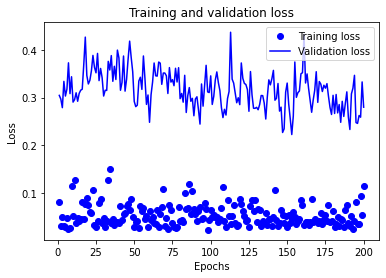

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

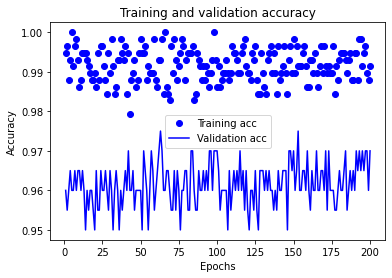

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
model.evaluate(test_features, one_hot_test_labels)

7/7 [==============================] - 0s 2ms/step - loss: 0.1320 - accuracy: 0.9846


[0.13197855651378632, 0.9846153855323792]

In [21]:
X_test = test_df[['peak_1', 'h_1', 'k_1', 'l_1', 'peak_2', 'h_2', 'k_2', 'l_2', 'peak_3', 'h_3', 'k_3', 'l_3', 'peak_4', 'h_4', 'k_4', 'l_4', 'peak_5', 'h_5', 'k_5', 'l_5', 'peak_6', 'h_6', 'k_6', 'l_6']]
y_test = test_df['space_code']

In [22]:
measured_test_labels = to_categorical(y_test)

In [23]:
model.evaluate(X_test, measured_test_labels)

15/15 [==============================] - 0s 3ms/step - loss: 16.4114 - accuracy: 0.1653


[16.411405563354492, 0.16525423526763916]